<a href="https://colab.research.google.com/github/AlejandroNunezArroyo/ARTIFICIAL-VISION/blob/main/Tutorial_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial 7: Fourier Transforms

The frequency components of an image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum.

In fact, an FT treats patterns of intensity in an image as sine waves with a particular frequency, and you can look at an interesting visualization of these sine wave components [on this page](https://plus.maths.org/content/fourier-transforms-images).

In this tutorial, we'll first look at a few simple image patterns to build up an idea of what image frequency components look like, and then transform a more complex image to see what it looks like in the frequency domain.

Import content of our drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/TUTORIAL_GRUPOS/assets/

1.jpg	     birds.jpg		pink_solid.jpg	vacas.jpg
bicycle.jpg  image_example.jpg	stripes.jpg


## 1. Load and display two images

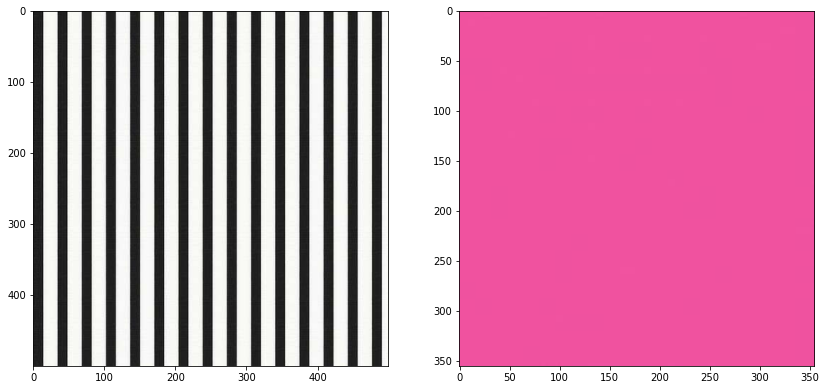

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the images
image_stripes = cv2.imread('/content/drive/MyDrive/TUTORIAL_GRUPOS/assets/stripes.jpg')
# Change color to RGB (from BGR)
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

# Read in the images
image_solid = cv2.imread('/content/drive/MyDrive/TUTORIAL_GRUPOS/assets/pink_solid.jpg')
# Change color to RGB (from BGR)
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.imshow(image_stripes)
ax2.imshow(image_solid)

## 2. Convert the images to grayscale

In [4]:
# convert to grayscale to focus on the intensity patterns in the image
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)

# normalize the image color values from a range of [0,255] to [0,1] for further processing
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    # Brings the center to the middle
    fshift = np.fft.fftshift(f)
    # scale magnitude values
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    return magnitude_spectrum


## 3. Apply Fourier Transform

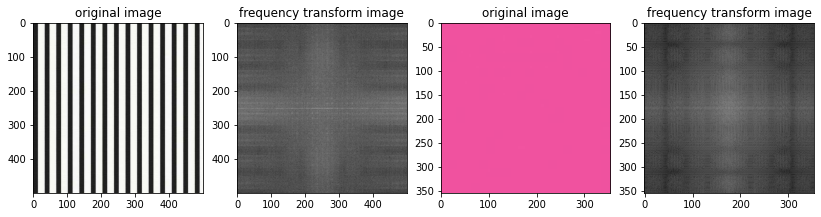

In [5]:
# Call the function on the normalized images
# and display the transforms
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

# display the images
# original images to the left of their frequency transform
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(14,7))

ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')


Low frequencies are at the center of the frequency transform image. 

The transform images for these example show that the solid image has most low-frequency components (as seen by the center bright spot). 

The stripes tranform image contains low-frequencies for the areas of white and black color and high frequencies for the edges in between those colors. The stripes transform image also tells us that there is one dominating direction for these frequencies; vertical stripes are represented by a horizontal line passing through the center of the frequency transform image.

## 4. 2D DFT for a real-world image

Text(0.5, 1.0, 'Magnitude spectrum')

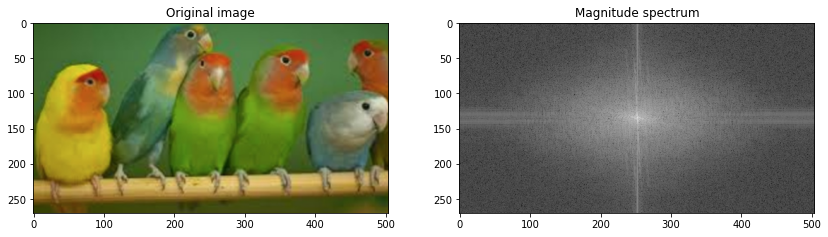

In [6]:
# Read in an image
image = cv2.imread('/content/drive/MyDrive/TUTORIAL_GRUPOS/assets/birds.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# normalize the image
norm_image = gray/255.0

f_image = ft_image(norm_image)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.imshow(image)
ax1.set_title('Original image')
ax2.imshow(f_image, cmap='gray')
ax2.set_title('Magnitude spectrum')

Notice that this image has components of all frequencies. You can see a bright spot in the center of the transform image, which tells us that a large portion of the image is low-frequency; this makes sense since the body of the birds and background are solid colors. The transform image also tells us that there are **two** dominating directions for these frequencies; vertical edges (from the edges of birds) are represented by a horizontal line passing through the center of the frequency transform image, and horizontal edges (from the branch and tops of the birds' heads) are represented by a vertical line passing through the center.

## 5. Filter and restore an image from the frequency domain

Since we already have a couple of images in the frequency domain, we can do some operations like high-pass or low-pass filtering. Then, we will have to implement inverse DFT to reconstruct the image. 



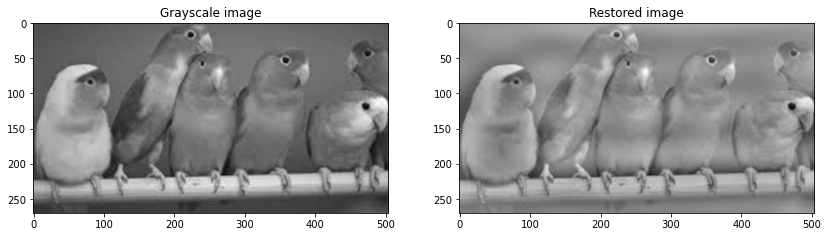

In [7]:
# Apply FT to the image
f = np.fft.fft2(norm_image)
# Move the center to the middle
fshift_mask = np.fft.fftshift(f)

rows, cols = norm_image.shape
# find the center 
crow, ccol = rows//2 , cols//2
# removes low-frequency components of an image (positioned in the center)

fshift_mask[crow-4:crow+5, ccol-4:ccol+5] = 0
# fshift_mask[crow-50:crow+50, ccol-50:ccol+50] = 0

# inverse fftshift brings the center to the original position
f_ishift = np.fft.ifftshift(fshift_mask)
# ifft2 converts the image from frequency domain to space domain 
img_back = np.fft.ifft2(f_ishift)
# select the real component
img_back = np.real(img_back)

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.imshow(gray, cmap='gray')
ax1.set_title('Grayscale image')
ax2.imshow(img_back, cmap='gray')
ax2.set_title('Restored image')

plt.show()

### Exercise 1: 
Load an image and implement Fourier Transform. Then, remove high frequency components (noise) and restore the image.  

#### Import image and adding noise

Text(0.5, 1.0, 'Noised image')

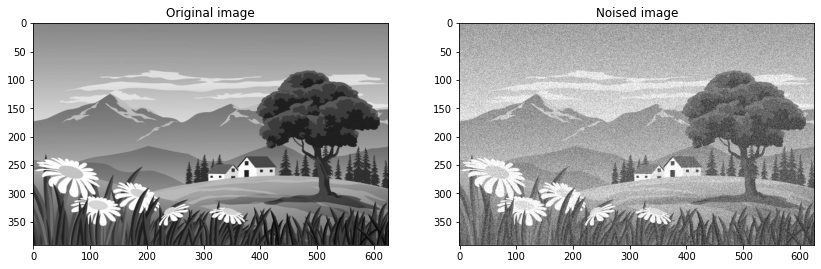

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.util import random_noise
import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = cv2.imread('/content/drive/MyDrive/TUTORIAL_GRUPOS/assets/image_example.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

noise_img = random_noise(gray, mode='gaussian',var=0.005)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.imshow(gray, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(noise_img, cmap='gray')
ax2.set_title('Noised image')


####Fourier transform

Text(0.5, 1.0, 'Noised Spectrum')

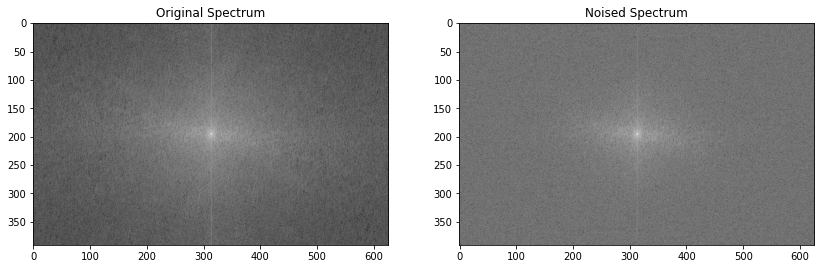

In [9]:
ni0 = gray/255.0
ni1 = noise_img/255.0

f0 = np.fft.fft2(ni0)
fshift0 = np.fft.fftshift(f0)
spectrum0 = 20*np.log(np.abs(fshift0))

f1 = np.fft.fft2(ni1)
fshift1 = np.fft.fftshift(f1)
spectrum1 = 20*np.log(np.abs(fshift1))

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.imshow(spectrum0, cmap='gray')
ax1.set_title('Original Spectrum')
ax2.imshow(spectrum1, cmap='gray')
ax2.set_title('Noised Spectrum')

#### Filtering

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


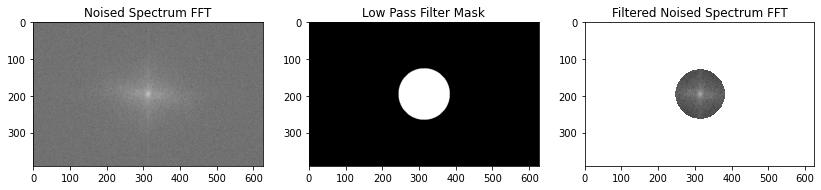

In [10]:
f2 = np.fft.fft2(ni1)
fshift2 = np.fft.fftshift(f2)

rows, cols = ni1.shape
crow, ccol = rows//2 , cols//2

mask = np.zeros((rows,cols), np.uint8)
x,y = np.ogrid[:rows,:cols]
circle_area = (x - crow)**2 + (y - ccol)**2 <= 70**2
mask[circle_area] = 1

f_shift3 = fshift2*mask
FFT_filtered = 20*np.log(np.abs(f_shift3))

f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(14,7))
ax1.imshow(spectrum1, cmap='gray')
ax1.set_title('Noised Spectrum FFT')
ax2.imshow(mask, cmap='gray')
ax2.set_title('Low Pass Filter Mask')
ax3.imshow(FFT_filtered, cmap='gray')
ax3.set_title('Filtered Noised Spectrum FFT')

plt.show()

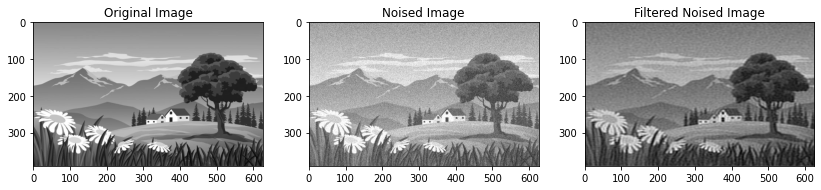

In [11]:
f_ishift = np.fft.ifftshift(f_shift3) 
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

# Display the result
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(14,7))

ax1.imshow(gray, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(noise_img, cmap='gray')
ax2.set_title('Noised Image')
ax3.imshow(img_back, cmap='gray')
ax3.set_title('Filtered Noised Image')

plt.show()

## 6. High and Low Pass Filters under Fourier Transformation

Let's remember high and low pass filters! Probably you wondered, what makes filters high and low-pass; why is a Sobel filter high-pass and a Gaussian filter low-pass?

Well, you can actually visualize the frequencies that these filters block out by taking a look at their fourier transforms. The frequency components of any image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum. So, let's treat our filters as small images, and display them in the frequency domain.

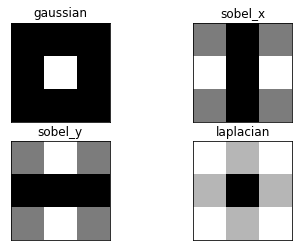

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Define gaussian, sobel, and laplacian (edge) filters

gaussian = (1/9)*np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])

sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian, edge filter
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [gaussian, sobel_x, sobel_y, laplacian]
filter_name = ['gaussian','sobel_x', \
                'sobel_y', 'laplacian']


# perform a fast fourier transform on each filter
# and create a scaled, frequency transform image
f_filters = [np.fft.fft2(x) for x in filters]
fshift = [np.fft.fftshift(y) for y in f_filters]
frequency_tx = [np.log(np.abs(z)+1) for z in fshift]

# display 4 filters
for i in range(len(filters)):
    plt.subplot(2,2,i+1),plt.imshow(frequency_tx[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Areas of white or light gray, allow that part of the frequency spectrum through! Areas of black mean that part of the spectrum is blocked out of the image. 

Recall that the low frequencies in the frequency spectrum are at the center of the frequency transform image, and high frequencies are at the edges. You should see that the Gaussian filter allows only low-pass frequencies through, which is the center of the frequency transformed image. The sobel filters block out frequencies of a certain orientation and a laplace (all edge, regardless of orientation) filter, should block out low-frequencies!

### Exercise 2: 

Now, load in an image, and filter it using a kernel of your choice. Then, apply a fourier transform to the original *and* filtered images and compare them.

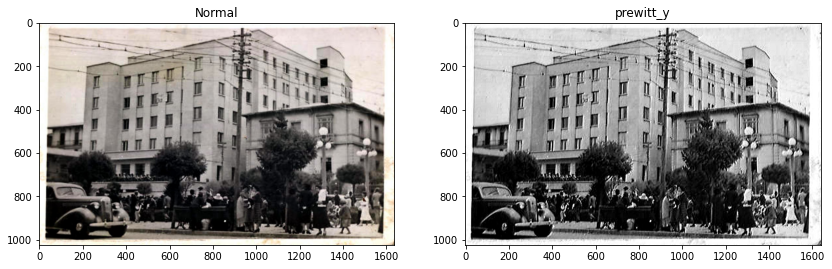

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

#Read in the image
image = mpimg.imread('/content/drive/MyDrive/TUTORIAL_GRUPOS/assets/1.jpg')

#Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#Prewitt vertical
prewitt_y = np.array([[-1, 0, 1], 
                   [ -1, 0, 1], 
                   [ -1, 1, 1]])

filtered_image3 = cv2.filter2D(gray, -1, prewitt_y)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7)) 
ax1.set_title('Normal')
ax1.imshow(image, cmap='gray')
ax2.set_title('prewitt_y')
ax2.imshow(filtered_image3, cmap='gray')

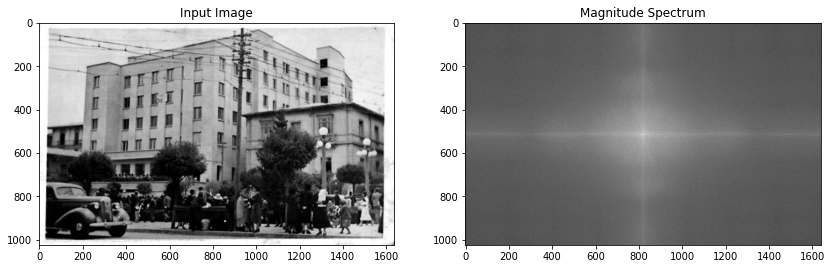

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/MyDrive/TUTORIAL_GRUPOS/assets/1.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7)) 
ax1.set_title('Input Image')
ax1.imshow(img, cmap='gray')
ax2.set_title('Magnitude Spectrum')
ax2.imshow(magnitude_spectrum, cmap='gray')

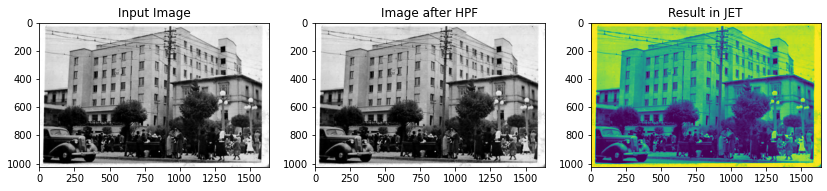

In [15]:
rows, cols = img.shape
crow,ccol = rows , cols
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,7)) 
ax1.set_title('Input Image')
ax1.imshow(img, cmap='gray')
ax2.set_title('Image after HPF')
ax2.imshow(img_back, cmap='gray')
ax3.set_title('Result in JET')
ax3.imshow(img_back)


In applied kernel that is prewitt-y and an improvement in the image is seen by eliminating most of the noise, giving improvement in the outlines of the image, compared to the Fourier transform, an improvement in the visibility of the image is seen. image by removing noise and showing a better image outline

## Exercise 3

Implement the previous exercise uniquely with OpenCV.

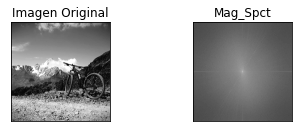

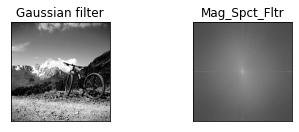

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/drive/MyDrive/TUTORIAL_GRUPOS/assets/bicycle.jpg',0)
copy = np.copy(img)

# applies gaussian blur with standar deviation  = 0 
kernel_size = 3
# parameters: image, kernel dimensions, sigma x, sigma y
gaussian = cv.GaussianBlur(copy,(kernel_size,kernel_size),0,0)

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

dft1 = cv.dft(np.float32(copy),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift1 = np.fft.fftshift(dft1)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
magnitude_spectrum_filtered = 20*np.log(cv.magnitude(dft_shift1[:,:,0],dft_shift1[:,:,1]))
plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Mag_Spct'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(223),plt.imshow(gaussian, cmap = 'gray')
plt.title('Gaussian filter'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(magnitude_spectrum_filtered, cmap = 'gray')
plt.title('Mag_Spct_Fltr'), plt.xticks([]), plt.yticks([])
plt.show()

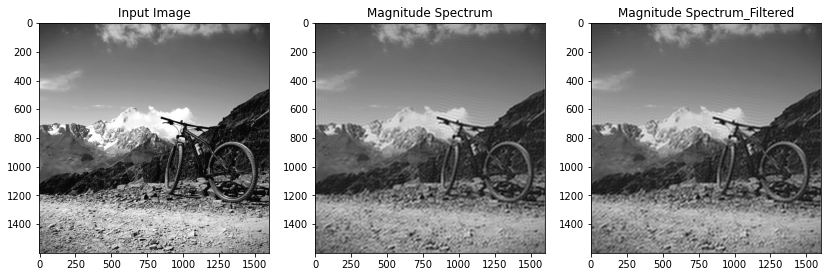

In [17]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask [crow-70:crow+70, ccol-70:ccol+70] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

fshift1 = dft_shift1*mask
f_ishift1 = np.fft.ifftshift(fshift1)
img_back1 = cv.idft(f_ishift1)
img_back1 = cv.magnitude(img_back1[:,:,0],img_back1[:,:,1])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,7)) 
ax1.set_title('Input Image')
ax1.imshow(img, cmap='gray')
ax2.set_title('Magnitude Spectrum')
ax2.imshow(img_back, cmap='gray')
ax3.set_title('Magnitude Spectrum_Filtered')
ax3.imshow(img_back1, cmap='gray')

In the case of cv2 based method the difference is that in the image processing there is a complex output in values 
which means that in algorithm it is necesary to interpret the information to make and plot the transformation correctly
but in general they are very similar functions and have similar parameters.


### Useful links

- https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm
- https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#additional-resources
- https://plus.maths.org/content/fourier-transforms-images